/var/folders/45/k62271qs5gxcyqffc9q59bvc0000gn/T/ipykernel_57773/3587657825.py:31: RuntimeWarning: divide by zero encountered in divide
  Etheta = -Utheta / R_grid
/var/folders/45/k62271qs5gxcyqffc9q59bvc0000gn/T/ipykernel_57773/3587657825.py:36: RuntimeWarning: invalid value encountered in multiply
  Ex = Er * np.cos(Theta_grid) - Etheta * np.sin(Theta_grid)
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/mpl_toolkits/mplot3d/axes3d.py:2624: RuntimeWarning: invalid value encountered in divide
  UVW = UVW[mask] / norm[mask].reshape((-1, 1))


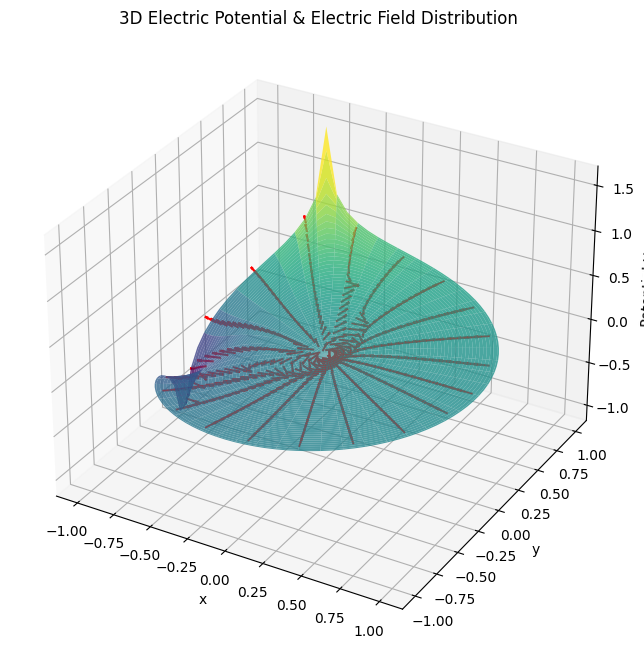

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 参数设置
R = 1  # 圆盘半径
sigma = 1  # 电导率 S/m
I1 = 1  # 电流强度 A
theta1 = 2 * np.pi / 3  # 正电极位置
theta2 = np.pi  # 负电极位置

# 网格划分
r = np.linspace(0, R, 100)
theta = np.linspace(0, 2 * np.pi, 100)
R_grid, Theta_grid = np.meshgrid(r, theta)

# 计算电位U(r,theta)
def calculate_U(r, theta, N_terms=100):
    U = np.zeros_like(r)
    for n in range(1, N_terms + 1):
        An = I1 / (sigma * n * np.pi * R ** n) * (np.cos(n * theta1) - np.cos(n * theta2))
        Bn = I1 / (sigma * n * np.pi * R ** n) * (np.sin(n * theta1) - np.sin(n * theta2))
        U += r ** n * (An * np.cos(n * theta) + Bn * np.sin(n * theta))
    return U

U = calculate_U(R_grid, Theta_grid)

# 电场计算
Ur, Utheta = np.gradient(U, r, theta, edge_order=2)
Er = -Ur
Etheta = -Utheta / R_grid

# 坐标转换
X = R_grid * np.cos(Theta_grid)
Y = R_grid * np.sin(Theta_grid)
Ex = Er * np.cos(Theta_grid) - Etheta * np.sin(Theta_grid)
Ey = Er * np.sin(Theta_grid) + Etheta * np.cos(Theta_grid)

# 绘制3D电势与电场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制电势曲面
ax.plot_surface(X, Y, U, cmap='viridis', alpha=0.8)

# 绘制电场矢量
step = 5  # 取稀疏点绘制箭头
ax.quiver(X[::step, ::step], Y[::step, ::step], U[::step, ::step],
          Ex[::step, ::step], Ey[::step, ::step], np.zeros_like(Ex[::step, ::step]),
          length=0.1, color='r', normalize=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential U')
ax.set_title('3D Electric Potential & Electric Field Distribution')
plt.show()


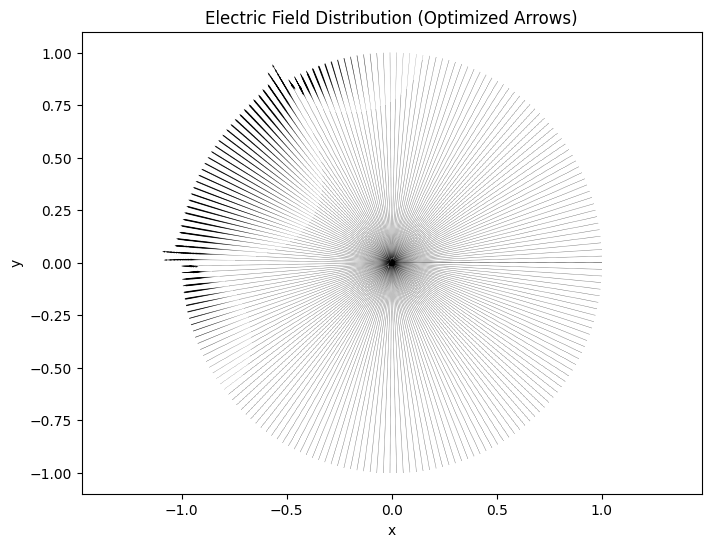

In [16]:
# 绘制电场分布图
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, Ex, Ey, color='black', scale=2000, width=0.001)
plt.title('Electric Field Distribution (Optimized Arrows)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

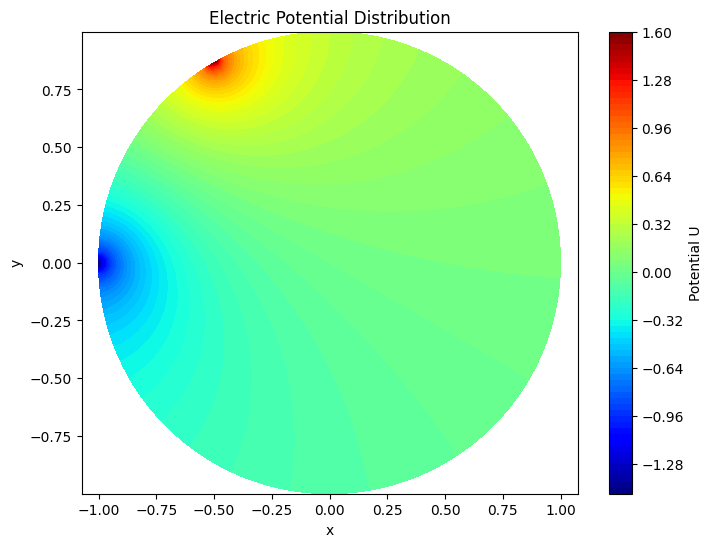

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
R = 1  # 圆盘半径
sigma = 1  # 电导率 S/m
I1 = 1  # 电流强度 A
theta1 = 2 * np.pi / 3  # 正电极位置
theta2 = np.pi  # 负电极位置

# 网格划分
r = np.linspace(0, R, 200)
theta = np.linspace(0, 2 * np.pi, 200)
R_grid, Theta_grid = np.meshgrid(r, theta)

# 计算电位U(r,theta)
def calculate_U(r, theta, N_terms=100):
    U = np.zeros_like(r)
    for n in range(1, N_terms + 1):
        An = I1 / (sigma * n * np.pi * R ** n) * (np.cos(n * theta1) - np.cos(n * theta2))
        Bn = I1 / (sigma * n * np.pi * R ** n) * (np.sin(n * theta1) - np.sin(n * theta2))
        U += r ** n * (An * np.cos(n * theta) + Bn * np.sin(n * theta))
    return U

U = calculate_U(R_grid, Theta_grid)

# 转换为笛卡尔坐标系
X = R_grid * np.cos(Theta_grid)
Y = R_grid * np.sin(Theta_grid)

# 绘制电势分布图
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, U, levels=100, cmap='jet')
plt.colorbar(label='Potential U')
plt.title('Electric Potential Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


/var/folders/45/k62271qs5gxcyqffc9q59bvc0000gn/T/ipykernel_57773/3352182244.py:70: RuntimeWarning: invalid value encountered in divide
  Etheta = -dU_dtheta / self.R_grid


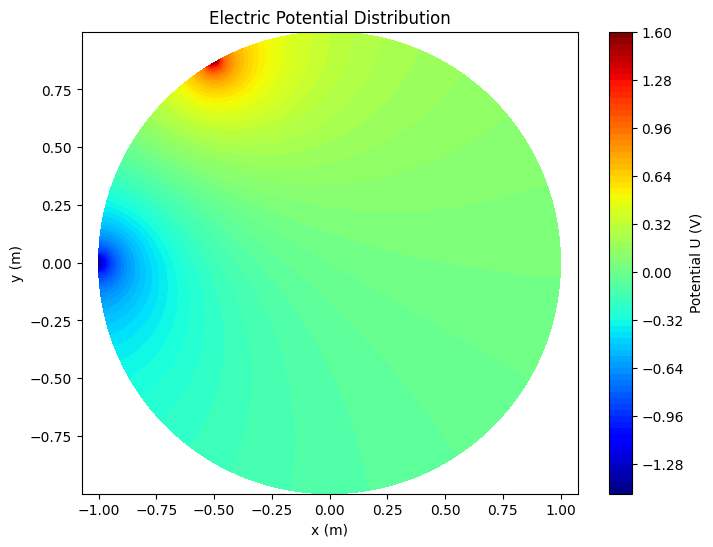

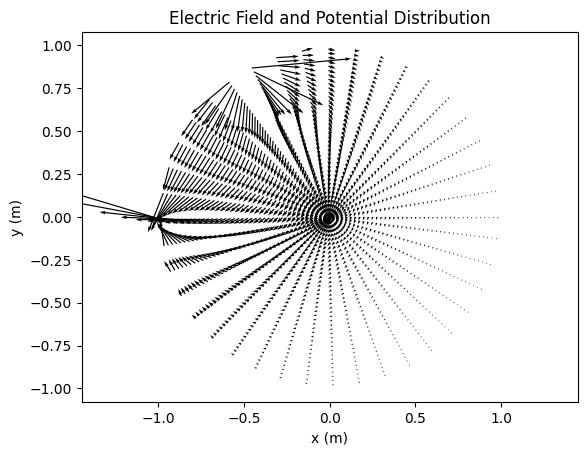

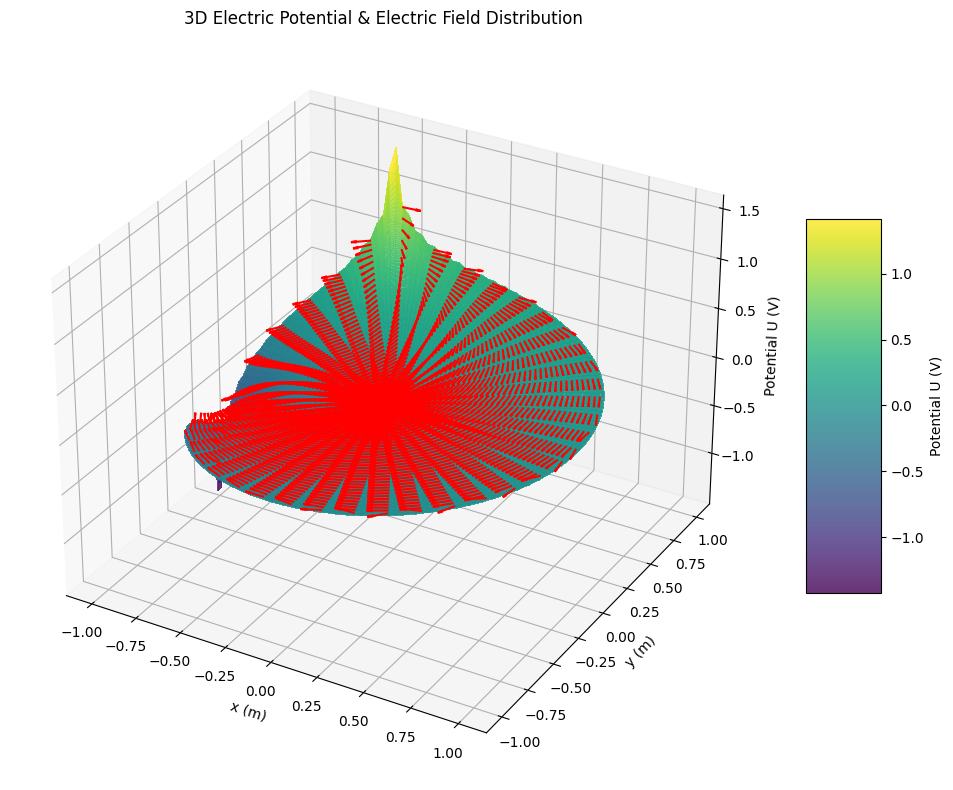

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ElectricDisk:
    def __init__(self, R=1.0, sigma=1.0, I1=1.0, theta1=2*np.pi/3, theta2=np.pi):
        """
        初始化导电圆盘的电势和电场计算类
        
        参数:
            R: 圆盘半径 (m)
            sigma: 电导率 (S/m)
            I1: 电流强度 (A)
            theta1: 正电极位置 (rad)
            theta2: 负电极位置 (rad)
        """
        self.R = R
        self.sigma = sigma
        self.I1 = I1
        self.theta1 = theta1
        self.theta2 = theta2
        
        # 创建网格
        self.r = np.linspace(0, R, 200)
        self.theta = np.linspace(0, 2*np.pi, 200)
        self.R_grid, self.Theta_grid = np.meshgrid(self.r, self.theta)
        
        # 计算电势和电场
        self.U = self.calculate_potential()
        self.Ex, self.Ey = self.calculate_electric_field()
        
    def calculate_potential(self, N_terms=100):
        """
        计算圆盘上的电势分布
        
        参数:
            N_terms: 傅里叶级数展开的项数
            
        返回:
            电势分布数组
        """
        r = self.R_grid
        theta = self.Theta_grid
        U = np.zeros_like(r)
        
        for n in range(1, N_terms + 1):
            An = self.I1 / (self.sigma * n * np.pi * self.R**n) * (np.cos(n * self.theta1) - np.cos(n * self.theta2))
            Bn = self.I1 / (self.sigma * n * np.pi * self.R**n) * (np.sin(n * self.theta1) - np.sin(n * self.theta2))
            U += r**n * (An * np.cos(n * theta) + Bn * np.sin(n * theta))
        
        return U
    
    def calculate_electric_field(self):
        """
        计算圆盘上的电场强度分布 (E = -∇U)
        
        返回:
            Ex, Ey: 电场强度的x和y分量
        """
        # 极坐标下的梯度计算
        dr = self.r[1] - self.r[0]
        dtheta = self.theta[1] - self.theta[0]
        
        # 计算径向和角度方向的偏导数
        dU_dr = np.gradient(self.U, dr, axis=1)
        dU_dtheta = np.gradient(self.U, dtheta, axis=0)
        
        # 转换为电场分量
        Er = -dU_dr
        Etheta = np.zeros_like(self.R_grid)
        
        # 避免除以零，只在r>0处计算Etheta
        mask = self.R_grid > 0
        Etheta[mask] = -dU_dtheta[mask] / self.R_grid[mask]
        
        # 转换为笛卡尔坐标系
        Ex = Er * np.cos(self.Theta_grid) - Etheta * np.sin(self.Theta_grid)
        Ey = Er * np.sin(self.Theta_grid) + Etheta * np.cos(self.Theta_grid)
        
        return Ex, Ey
    
    def plot_potential(self):
        """绘制电势分布图"""
        X = self.R_grid * np.cos(self.Theta_grid)
        Y = self.R_grid * np.sin(self.Theta_grid)
        
        plt.figure(figsize=(8, 6))
        plt.contourf(X, Y, self.U, levels=100, cmap='jet')
        plt.colorbar(label='Potential U (V)')
        plt.title('Electric Potential Distribution')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.axis('equal')
        plt.show()
        
    def plot_electric_field(self, stride=10):
        """绘制电场矢量图"""
        X = self.R_grid * np.cos(self.Theta_grid)
        Y = self.R_grid * np.sin(self.Theta_grid)
        
        # plt.figure(figsize=(8, 6))
        # plt.contourf(X, Y, self.U, levels=100, cmap='jet', alpha=0.7)
        # plt.colorbar(label='Potential U (V)')
        
        # 下采样以避免过于密集的箭头
        X_sub = X[::stride, ::stride]
        Y_sub = Y[::stride, ::stride]
        Ex_sub = self.Ex[::stride, ::stride]
        Ey_sub = self.Ey[::stride, ::stride]
        
        plt.quiver(X_sub, Y_sub, Ex_sub, Ey_sub)
        plt.title('Electric Field and Potential Distribution')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.axis('equal')
        plt.show()

    def plot3D(self, step=5, potential_cmap='viridis', field_color='r'):
        """
        绘制3D电势曲面和电场矢量
        
        参数:
            step: 电场矢量绘制的下采样步长
            potential_cmap: 电势曲面使用的颜色映射
            field_color: 电场矢量的颜色
        """
        # 转换为笛卡尔坐标系
        X = self.R_grid * np.cos(self.Theta_grid)
        Y = self.R_grid * np.sin(self.Theta_grid)
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        # 绘制电势曲面
        surf = ax.plot_surface(X, Y, self.U, 
                              cmap=potential_cmap, 
                              alpha=0.8,
                              rstride=1,
                              cstride=1,
                              linewidth=0,
                              antialiased=False)
        
        # 添加颜色条
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Potential U (V)')
        
        # 绘制电场矢量
        ax.quiver(X[::step, ::step], 
                 Y[::step, ::step], 
                 self.U[::step, ::step],
                 self.Ex[::step, ::step], 
                 self.Ey[::step, ::step], 
                 np.zeros_like(self.Ex[::step, ::step]),
                 length=0.1, 
                 color=field_color, 
                 normalize=True,
                 arrow_length_ratio=0.3)
        
        ax.set_xlabel('x (m)')
        ax.set_ylabel('y (m)')
        ax.set_zlabel('Potential U (V)')
        ax.set_title('3D Electric Potential & Electric Field Distribution')
        
        plt.tight_layout()
        plt.show()

# 使用示例
if __name__ == "__main__":
    disk = ElectricDisk(R=1.0, sigma=1.0, I1=1.0)
    disk.plot_potential()
    disk.plot_electric_field(5)
    disk.plot3D(step=5, potential_cmap='viridis', field_color='r')

/var/folders/45/k62271qs5gxcyqffc9q59bvc0000gn/T/ipykernel_57773/4206387001.py:224: RuntimeWarning: invalid value encountered in divide
  nx = self.X / np.sqrt(self.X**2 + self.Y**2)
/var/folders/45/k62271qs5gxcyqffc9q59bvc0000gn/T/ipykernel_57773/4206387001.py:225: RuntimeWarning: invalid value encountered in divide
  ny = self.Y / np.sqrt(self.X**2 + self.Y**2)


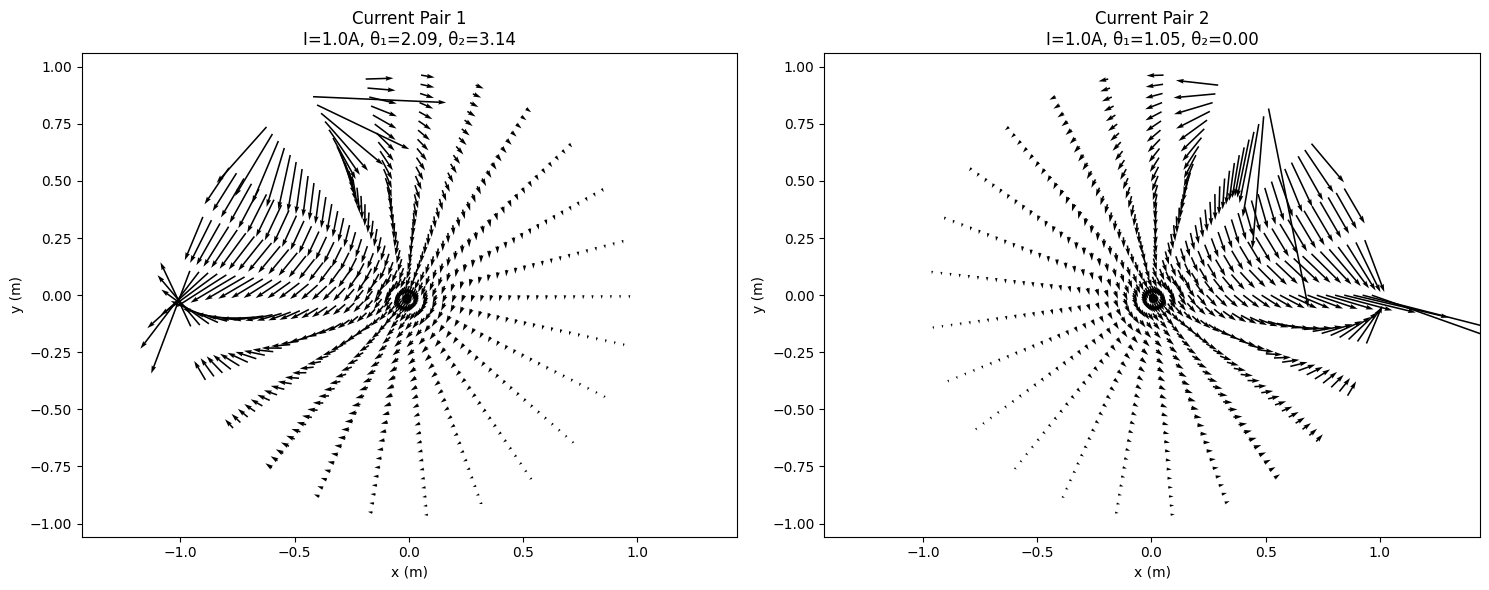

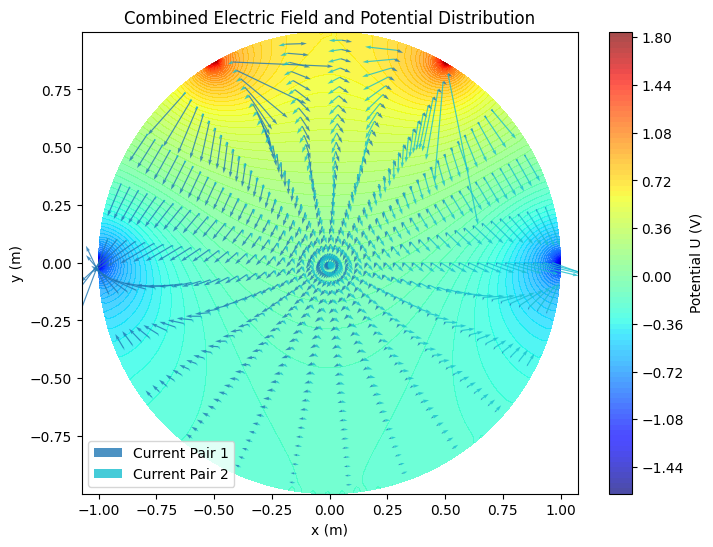

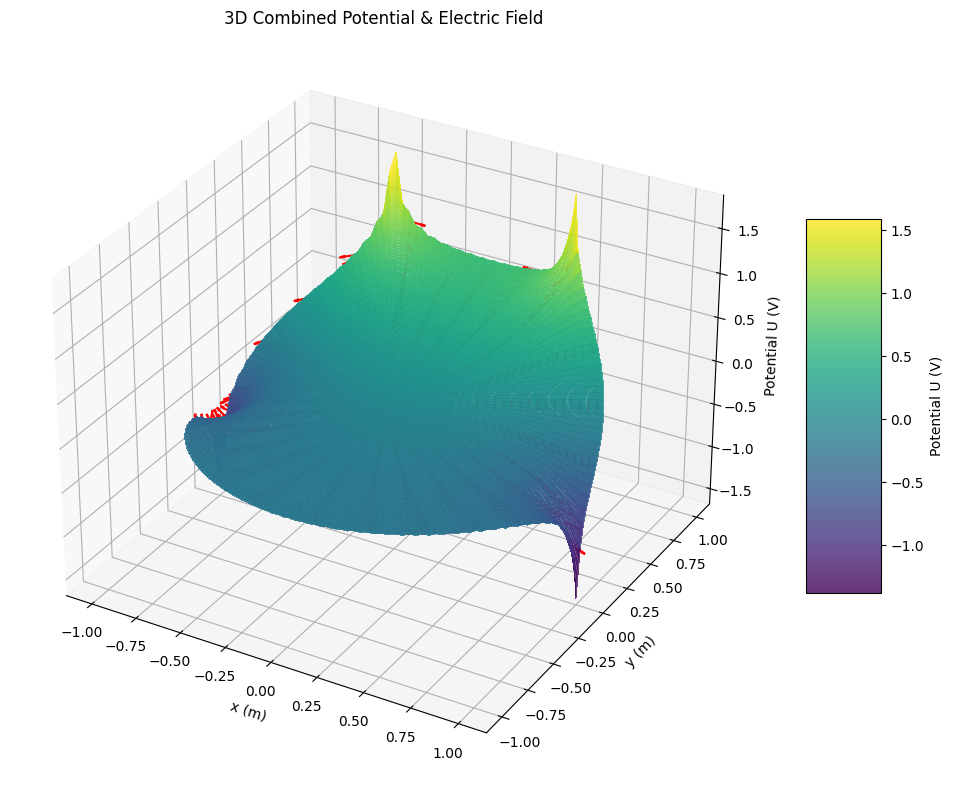

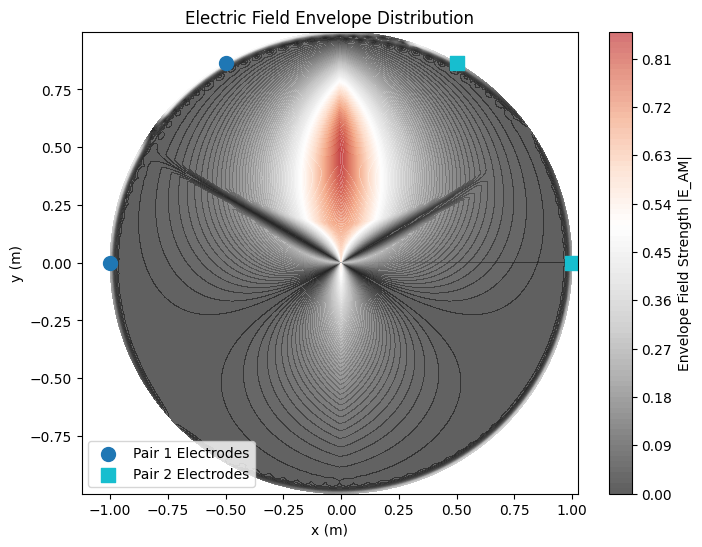

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

class ElectricDisk:
    def __init__(self, R=1.0, sigma=1.0, currents=None):
        """
        初始化导电圆盘的电势和电场计算类
        
        参数:
            R: 圆盘半径 (m)
            sigma: 电导率 (S/m)
            currents: 电流对列表，每个元素为(I, theta1, theta2)
        """
        self.R = R
        self.sigma = sigma
        self.currents = currents if currents is not None else [
            (1.0, 2*np.pi/3, np.pi),  # 默认第一对电流
            (1.0, np.pi/3, 0)         # 新增第二对电流
        ]
        
        # 设置颜色表 (使用tab10颜色映射，最多支持10个电流对)
        self.color_table = plt.cm.tab10(np.linspace(0, 1, len(self.currents)))
        
        # 创建网格
        self.r = np.linspace(0, R, 200)
        self.theta = np.linspace(0, 2*np.pi, 200)
        self.R_grid, self.Theta_grid = np.meshgrid(self.r, self.theta)

        self.X = self.R_grid * np.cos(self.Theta_grid)
        self.Y = self.R_grid * np.sin(self.Theta_grid)

        self.U = self.calculate_potential()
        self.Ex, self.Ey = self.calculate_electric_field()
        self.individual_fields = self.calculate_individual_fields()
        self.envelope = self.calculate_envelope()
        
    def calculate_potential(self, N_terms=100):
        """
        计算圆盘上的总电势分布
        
        参数:
            N_terms: 傅里叶级数展开的项数
            
        返回:
            电势分布数组
        """
        r = self.R_grid
        theta = self.Theta_grid
        U_total = np.zeros_like(r)
        
        for I, theta1, theta2 in self.currents:
            U = np.zeros_like(r)
            for n in range(1, N_terms + 1):
                An = I / (self.sigma * n * np.pi * self.R**n) * (np.cos(n * theta1) - np.cos(n * theta2))
                Bn = I / (self.sigma * n * np.pi * self.R**n) * (np.sin(n * theta1) - np.sin(n * theta2))
                U += r**n * (An * np.cos(n * theta) + Bn * np.sin(n * theta))
            U_total += U
        
        return U_total
    
    def calculate_individual_fields(self, N_terms=100):
        """
        计算每个电流对单独产生的电场分布
        
        返回:
            列表，包含每个电流对的(Ex, Ey)电场分量
        """
        individual_fields = []
        r = self.R_grid
        theta = self.Theta_grid
        
        for I, theta1, theta2 in self.currents:
            # 计算单个电流对的电势
            U = np.zeros_like(r)
            for n in range(1, N_terms + 1):
                An = I / (self.sigma * n * np.pi * self.R**n) * (np.cos(n * theta1) - np.cos(n * theta2))
                Bn = I / (self.sigma * n * np.pi * self.R**n) * (np.sin(n * theta1) - np.sin(n * theta2))
                U += r**n * (An * np.cos(n * theta) + Bn * np.sin(n * theta))
            
            # 计算单个电流对的电场
            dr = self.r[1] - self.r[0]
            dtheta = self.theta[1] - self.theta[0]
            
            dU_dr = np.gradient(U, dr, axis=1)
            dU_dtheta = np.gradient(U, dtheta, axis=0)
            
            Er = -dU_dr
            Etheta = np.zeros_like(self.R_grid)
            mask = self.R_grid > 0
            Etheta[mask] = -dU_dtheta[mask] / self.R_grid[mask]
            
            Ex = Er * np.cos(self.Theta_grid) - Etheta * np.sin(self.Theta_grid)
            Ey = Er * np.sin(self.Theta_grid) + Etheta * np.cos(self.Theta_grid)
            
            individual_fields.append((Ex, Ey))
        
        return individual_fields
    
    def calculate_electric_field(self):
        """计算总电场强度分布 (E = -∇U)"""
        dr = self.r[1] - self.r[0]
        dtheta = self.theta[1] - self.theta[0]
        
        dU_dr = np.gradient(self.U, dr, axis=1)
        dU_dtheta = np.gradient(self.U, dtheta, axis=0)
        
        Er = -dU_dr
        Etheta = np.zeros_like(self.R_grid)
        mask = self.R_grid > 0
        Etheta[mask] = -dU_dtheta[mask] / self.R_grid[mask]
        
        Ex = Er * np.cos(self.Theta_grid) - Etheta * np.sin(self.Theta_grid)
        Ey = Er * np.sin(self.Theta_grid) + Etheta * np.cos(self.Theta_grid)
        
        return Ex, Ey
    
    def plot_individual_fields(self, stride=10):
        """绘制每个电流对的独立电场分布"""
        X = self.R_grid * np.cos(self.Theta_grid)
        Y = self.R_grid * np.sin(self.Theta_grid)
        
        fig, axes = plt.subplots(1, len(self.currents), figsize=(15, 6))
        
        for i, ((Ex, Ey), (I, theta1, theta2)) in enumerate(zip(self.individual_fields, self.currents)):
            ax = axes[i] if len(self.currents) > 1 else axes
            X_sub = X[::stride, ::stride]
            Y_sub = Y[::stride, ::stride]
            Ex_sub = Ex[::stride, ::stride]
            Ey_sub = Ey[::stride, ::stride]
            
            ax.quiver(X_sub, Y_sub, Ex_sub, Ey_sub)
            ax.set_title(f'Current Pair {i+1}\nI={I}A, θ₁={theta1:.2f}, θ₂={theta2:.2f}')
            ax.set_xlabel('x (m)')
            ax.set_ylabel('y (m)')
            ax.axis('equal')
        
        plt.tight_layout()
        plt.show()
    
    def plot_combined_field(self, stride=10):
        """绘制总电场分布，不同电流对使用不同颜色"""
        X = self.R_grid * np.cos(self.Theta_grid)
        Y = self.R_grid * np.sin(self.Theta_grid)
        
        plt.figure(figsize=(8, 6))
        
        # 绘制总电势分布
        plt.contourf(X, Y, self.U, levels=100, cmap='jet', alpha=0.7)
        plt.colorbar(label='Potential U (V)')
        
        # 绘制每个电流对的电场（不同颜色）
        for i, (Ex, Ey) in enumerate(self.individual_fields):
            X_sub = X[::stride, ::stride]
            Y_sub = Y[::stride, ::stride]
            Ex_sub = Ex[::stride, ::stride]
            Ey_sub = Ey[::stride, ::stride]
            
            # 使用颜色表中对应的颜色
            plt.quiver(X_sub, Y_sub, Ex_sub, Ey_sub, 
                      color=self.color_table[i],
                      label=f'Current Pair {i+1}',
                      alpha=0.8)
        
        plt.title('Combined Electric Field and Potential Distribution')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.legend()
        plt.axis('equal')
        plt.show()
    
    def plot3D(self, step=5, potential_cmap='viridis', field_color='r'):
        """绘制3D总电势曲面和总电场矢量"""
        X = self.R_grid * np.cos(self.Theta_grid)
        Y = self.R_grid * np.sin(self.Theta_grid)
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        surf = ax.plot_surface(X, Y, self.U, 
                             cmap=potential_cmap, 
                             alpha=0.8,
                             rstride=1,
                             cstride=1,
                             linewidth=0,
                             antialiased=False)
        
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Potential U (V)')
        
        ax.quiver(X[::step, ::step], 
                 Y[::step, ::step], 
                 self.U[::step, ::step],
                 self.Ex[::step, ::step], 
                 self.Ey[::step, ::step], 
                 np.zeros_like(self.Ex[::step, ::step]),
                 length=0.1, 
                 color=field_color, 
                 normalize=True,
                 arrow_length_ratio=0.3)
        
        ax.set_xlabel('x (m)')
        ax.set_ylabel('y (m)')
        ax.set_zlabel('Potential U (V)')
        ax.set_title('3D Combined Potential & Electric Field')
        plt.tight_layout()
        plt.show()

    def calculate_envelope(self):
        """
        计算电场包络 |E_AM| = ||(E1+E2)·n| - |(E1-E2)·n||
        
        返回:
            包络场强分布
        """
        if len(self.individual_fields) < 2:
            return np.zeros_like(self.R_grid)
        
        # 获取前两个电流对的电场
        E1x, E1y = self.individual_fields[0]
        E2x, E2y = self.individual_fields[1]
        
        # 计算单位法向量场 (径向方向)
        nx = self.X / np.sqrt(self.X**2 + self.Y**2)
        ny = self.Y / np.sqrt(self.X**2 + self.Y**2)
        nx[self.X == 0] = 0  # 处理中心点
        ny[self.Y == 0] = 0
        
        # 计算E1+E2和E1-E2
        E_plus_x = E1x + E2x
        E_plus_y = E1y + E2y
        E_minus_x = E1x - E2x
        E_minus_y = E1y - E2y
        
        # 计算点积
        dot_plus = E_plus_x * nx + E_plus_y * ny
        dot_minus = E_minus_x * nx + E_minus_y * ny
        
        # 计算包络
        envelope = np.abs(np.abs(dot_plus) - np.abs(dot_minus))
        
        return envelope

    def plot_envelope(self):
        """绘制电场包络分布"""
        plt.figure(figsize=(8, 6))
        
        # 绘制包络场强
        contour = plt.contourf(self.X, self.Y, self.envelope, 
                        levels=100, cmap='RdGy_r', alpha=0.7, vmin=0, vmax=1)
        plt.colorbar(contour, label='Envelope Field Strength |E_AM|')

        
        # 标记电极位置
        for i, (_, theta1, theta2) in enumerate(self.currents):
            x1, y1 = self.R * np.cos(theta1), self.R * np.sin(theta1)
            x2, y2 = self.R * np.cos(theta2), self.R * np.sin(theta2)
            plt.scatter([x1, x2], [y1, y2], 
                       color=self.color_table[i],
                       marker='o' if i == 0 else 's',
                       s=100, 
                       label=f'Pair {i+1} Electrodes')
        
        plt.title('Electric Field Envelope Distribution')
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.legend()
        plt.axis('equal')
        plt.show()



/var/folders/45/k62271qs5gxcyqffc9q59bvc0000gn/T/ipykernel_57773/4206387001.py:224: RuntimeWarning: invalid value encountered in divide
  nx = self.X / np.sqrt(self.X**2 + self.Y**2)
/var/folders/45/k62271qs5gxcyqffc9q59bvc0000gn/T/ipykernel_57773/4206387001.py:225: RuntimeWarning: invalid value encountered in divide
  ny = self.Y / np.sqrt(self.X**2 + self.Y**2)


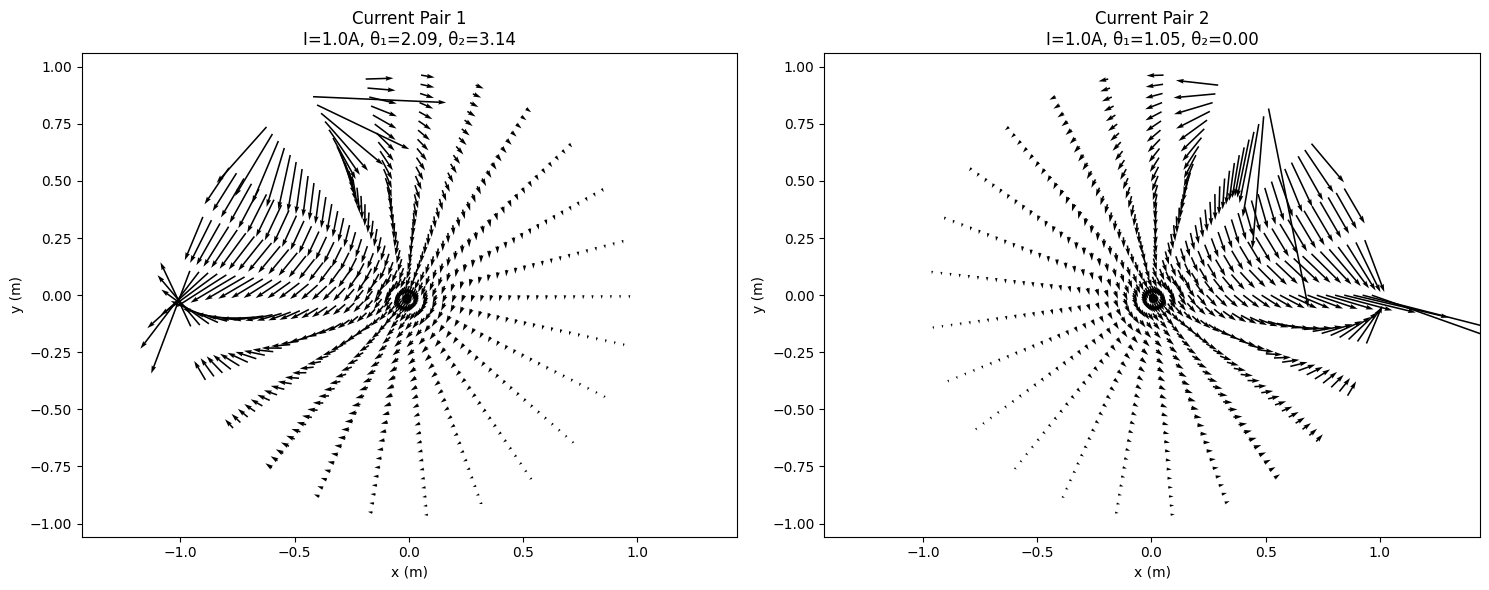

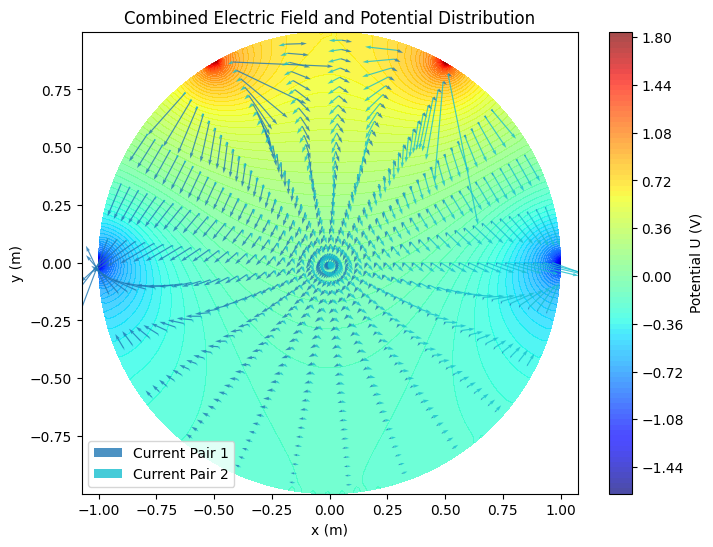

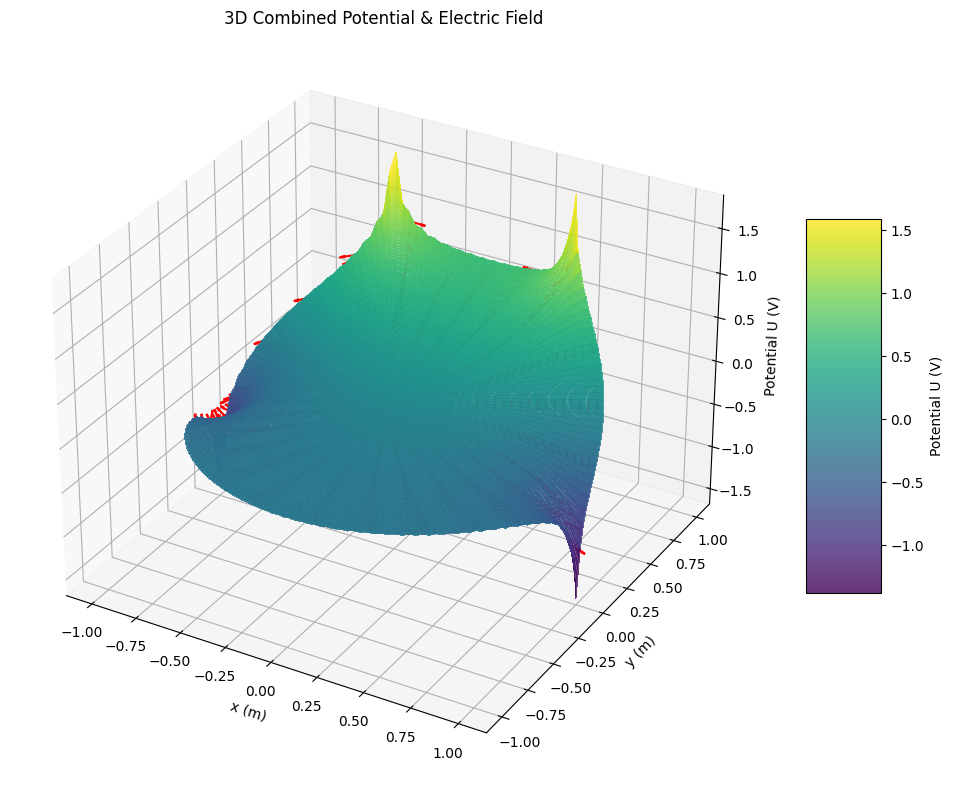

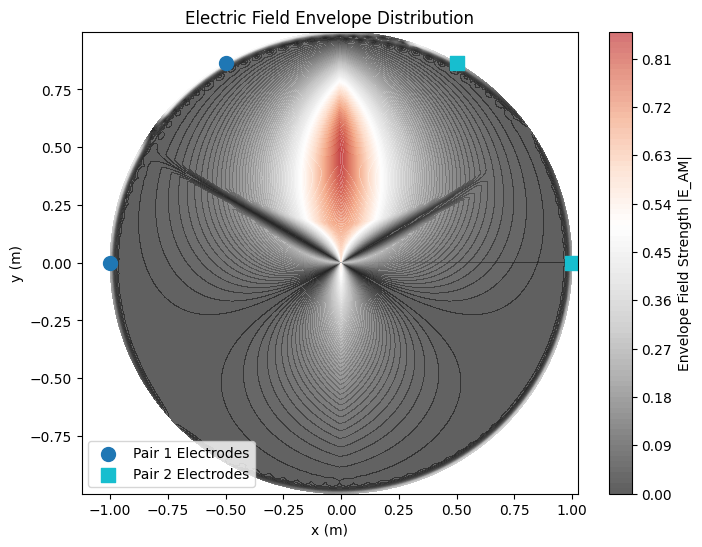

In [66]:
# 使用示例
if __name__ == "__main__":
    # 定义两对电流
    currents = [
        (1.0, 2*np.pi/3, np.pi),  # 第一对电流
        (1.0, np.pi/3, 0)         # 第二对电流
    ]
    
    disk = ElectricDisk(R=1.0, sigma=1.0, currents=currents)
    
    # 绘制各个电流对的独立电场
    disk.plot_individual_fields(stride=8)
    
    # 绘制总电场和电势
    disk.plot_combined_field(stride=8)
    
    # 绘制3D总电势和电场
    disk.plot3D(step=8, field_color='r')

    # 绘制电场包络
    disk.plot_envelope()

[0, 10, 2, 8]

/var/folders/45/k62271qs5gxcyqffc9q59bvc0000gn/T/ipykernel_57773/4206387001.py:224: RuntimeWarning: invalid value encountered in divide
  nx = self.X / np.sqrt(self.X**2 + self.Y**2)
/var/folders/45/k62271qs5gxcyqffc9q59bvc0000gn/T/ipykernel_57773/4206387001.py:225: RuntimeWarning: invalid value encountered in divide
  ny = self.Y / np.sqrt(self.X**2 + self.Y**2)


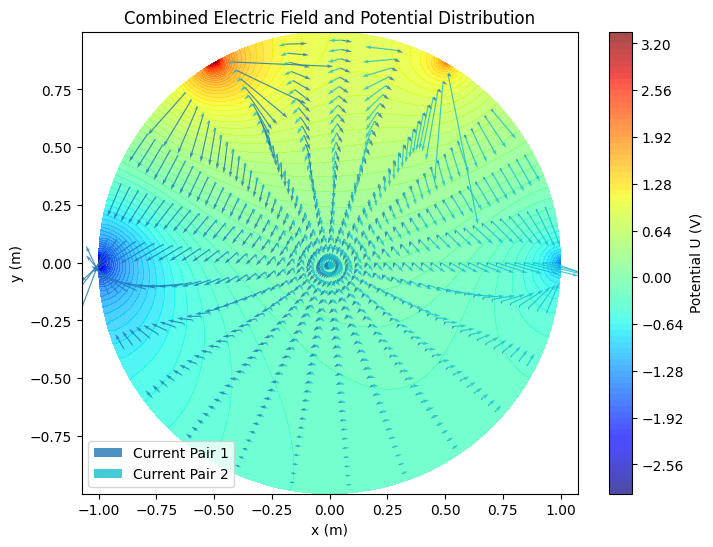

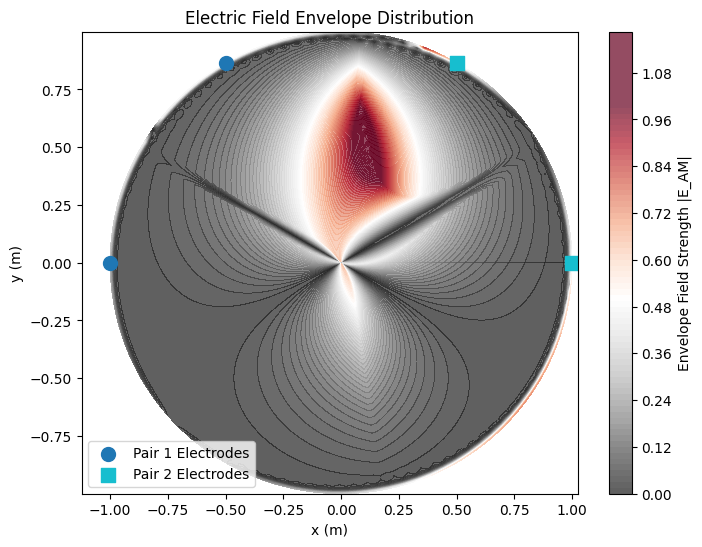

In [67]:
currents = [
        (2.0, 2*np.pi/3, np.pi),  # 第一对电流
        (1.0, np.pi/3, 0)         # 第二对电流
    ]
disk = ElectricDisk(R=1.0, sigma=1.0, currents=currents)
# 绘制总电场和电势
disk.plot_combined_field(stride=8)
# 绘制电场包络
disk.plot_envelope()

In [70]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

class ElectricDiskOptimizer:
    def __init__(self, R=1.0, sigma=1.0, n_points=100):
        """初始化优化器"""
        self.R = R
        self.sigma = sigma
        self.n_points = n_points
        
        # 定义目标区域（示例：60度扇形区域）
        self.target_angle = (np.pi/3, 2*np.pi/3)  # Hr区域
        self.non_target_angle = (0, np.pi/3)      # Nh区域
        
        # 创建网格
        self.r = np.linspace(0, R, n_points)
        self.theta = np.linspace(0, 2*np.pi, n_points)
        self.R_grid, self.Theta_grid = np.meshgrid(self.r, self.theta)
        self.X = self.R_grid * np.cos(self.Theta_grid)
        self.Y = self.R_grid * np.sin(self.Theta_grid)
        
        # 创建区域掩模
        self.hr_mask = self.create_region_mask(*self.target_angle)
        self.nh_mask = self.create_region_mask(*self.non_target_angle)
    
    def create_region_mask(self, start_angle, end_angle):
        """创建区域掩模"""
        angle_mask = (self.Theta_grid >= start_angle) & (self.Theta_grid <= end_angle)
        radius_mask = self.R_grid > 0  # 排除中心点
        return angle_mask & radius_mask
    
    def safe_normalize(self, x, y):
        """安全归一化向量，避免除以零"""
        norm = np.sqrt(x**2 + y**2)
        mask = norm > 0
        nx, ny = np.zeros_like(x), np.zeros_like(y)
        nx[mask] = x[mask]/norm[mask]
        ny[mask] = y[mask]/norm[mask]
        return nx, ny
    
    def calculate_envelope(self, currents):
        """计算电场包络"""
        # 重新组织电流参数
        current_pairs = []
        for i in range(0, len(currents), 3):
            current_pairs.append((currents[i], currents[i+1], currents[i+2]))
        
        # 创建ElectricDisk实例
        disk = ElectricDisk(R=self.R, sigma=self.sigma, 
                          currents=current_pairs,
                          n_points=self.n_points)
        
        # 获取前两个电流对的电场
        if len(disk.individual_fields) < 2:
            return np.zeros_like(disk.X)
        
        E1x, E1y = disk.individual_fields[0]
        E2x, E2y = disk.individual_fields[1]
        
        # 计算单位法向量场（径向方向）
        nx, ny = self.safe_normalize(disk.X, disk.Y)
        
        # 计算E1+E2和E1-E2
        E_plus_x = E1x + E2x
        E_plus_y = E1y + E2y
        E_minus_x = E1x - E2x
        E_minus_y = E1y - E2y
        
        # 计算点积
        dot_plus = E_plus_x * nx + E_plus_y * ny
        dot_minus = E_minus_x * nx + E_minus_y * ny
        
        # 计算包络
        envelope = np.abs(np.abs(dot_plus) - np.abs(dot_minus))
        return envelope
    
    def objective_function(self, currents):
        """
        目标函数 Ratio = E_area^Hr / E_area^Nh
        电流参数格式: [I1, theta1+, theta1-, I2, theta2+, theta2-, ...]
        """
        envelope = self.calculate_envelope(currents)
        
        # 计算区域平均场强
        E_hr = np.mean(envelope[self.hr_mask])
        E_nh = np.mean(envelope[self.nh_mask])
        
        # 防止除以零
        if E_nh < 1e-6:
            return -E_hr  # 只最大化Hr区域场强
        return -E_hr / E_nh  # 最小化负比率
    
    def optimize(self, initial_currents=None, bounds=None):
        """执行优化"""
        if initial_currents is None:
            initial_currents = [1.0, np.pi/3, 4*np.pi/3, 
                              1.0, 5*np.pi/3, np.pi/2]
        
        if bounds is None:
            # 默认边界：电流[0.1, 2]，角度[0, 2π]
            bounds = [(0.1, 2)] + [(0, 2*np.pi)]*2
            bounds *= len(initial_currents) // 3
        
        result = minimize(self.objective_function,
                         initial_currents,
                         bounds=bounds,
                         method='L-BFGS-B',
                         options={'maxiter': 50})
        
        return result
    
    def visualize_results(self, currents):
        """可视化优化结果"""
        current_pairs = []
        for i in range(0, len(currents), 3):
            current_pairs.append((currents[i], currents[i+1], currents[i+2]))
        
        envelope = self.calculate_envelope(currents)
        
        plt.figure(figsize=(12, 5))
        
        # 绘制包络分布
        plt.subplot(121)
        contour = plt.contourf(self.X, self.Y, envelope, 
                             levels=100, cmap='viridis')
        plt.colorbar(contour, label='Envelope Field Strength')
        
        # 标记目标区域
        wedge_hr = Wedge((0,0), self.R, 
                        *np.degrees(self.target_angle),
                        fc='none', ec='r', lw=2, linestyle='--')
        wedge_nh = Wedge((0,0), self.R,
                        *np.degrees(self.non_target_angle),
                        fc='none', ec='b', lw=2, linestyle='--')
        plt.gca().add_patch(wedge_hr)
        plt.gca().add_patch(wedge_nh)
        
        # 标记电极位置
        for i, (_, theta1, theta2) in enumerate(current_pairs):
            x1, y1 = self.R * np.cos(theta1), self.R * np.sin(theta1)
            x2, y2 = self.R * np.cos(theta2), self.R * np.sin(theta2)
            plt.scatter([x1, x2], [y1, y2], 
                       color=f'C{i}',
                       marker='o' if i == 0 else 's',
                       s=100,
                       label=f'Pair {i+1}')
        
        plt.title(f'Optimized Field Distribution\nRatio = {-self.objective_function(currents):.2f}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.axis('equal')
        
        # 绘制电流对配置
        plt.subplot(122)
        for i, (I, theta1, theta2) in enumerate(current_pairs):
            plt.plot([theta1, theta2], [I, I], 
                    marker='o', 
                    linestyle='-',
                    label=f'Pair {i+1}: I={I:.2f}A')
        
        plt.xticks(np.linspace(0, 2*np.pi, 5),
                   ['0', 'π/2', 'π', '3π/2', '2π'])
        plt.xlabel('Electrode Position (rad)')
        plt.ylabel('Current (A)')
        plt.title('Current Pair Configuration')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# 使用示例
if __name__ == "__main__":
    optimizer = ElectricDiskOptimizer(R=1.0)
    
    # 执行优化
    result = optimizer.optimize()
    print("Optimization result:", result.x)
    print("Final ratio:", -result.fun)
    
    # 可视化结果
    optimizer.visualize_results(result.x)

TypeError: ElectricDisk.__init__() got an unexpected keyword argument 'n_points'

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from scipy.ndimage import zoom
from ElectricDisk import ElectricDisk

class ElectricDiskOptimizer:
    def __init__(self, R=1.0, sigma=1.0, n_points=200, target_region=None):
        """初始化优化器"""
        self.R = R
        self.sigma = sigma
        self.n_points = n_points
        
        # 创建网格
        self.r = np.linspace(0, R, n_points)
        self.theta = np.linspace(0, 2 * np.pi, n_points)
        self.R_grid, self.Theta_grid = np.meshgrid(self.r, self.theta)
        self.X = self.R_grid * np.cos(self.Theta_grid)
        self.Y = self.R_grid * np.sin(self.Theta_grid)
        
        # 设置目标区域 (默认: 圆形 r=0.5, theta=pi/4, 半径=0.1)
        if target_region is None:
            target_region = {"type": "circle", "center": (0.5, np.pi/4), "radius": 0.1}
        self.target_region = target_region
        
        # 创建目标区域掩模
        self.hr_mask = self.create_region_mask(self.target_region)
        
        # 创建非目标区域掩模 (示例: 半径 > 0.6)
        self.nh_mask = self.R_grid > 0.6

    def create_region_mask(self, region):
        """创建目标区域掩模"""
        if region["type"] == "circle":
            # 圆形区域: 计算与圆心的距离
            r_center, theta_center = region["center"]
            x_center = r_center * np.cos(theta_center)
            y_center = r_center * np.sin(theta_center)
            distance = np.sqrt((self.X - x_center) ** 2 + (self.Y - y_center) ** 2)
            return distance <= region["radius"]
        elif region["type"] == "sector":
            # 扇形区域: 使用角度范围
            start_angle, end_angle = region["angles"]
            angle_mask = (self.Theta_grid >= start_angle) & (self.Theta_grid <= end_angle)
            radius_mask = self.R_grid > 0  # 排除中心点
            return angle_mask & radius_mask
        else:
            raise ValueError("Unsupported region type. Use 'circle' or 'sector'.")

    def resize_mask(self, mask, target_shape):
        """Resize a mask to match the target shape."""
        zoom_factors = (
            target_shape[0] / mask.shape[0],
            target_shape[1] / mask.shape[1]
        )
        return zoom(mask, zoom_factors, order=0)  # Use nearest-neighbor interpolation
    
    def safe_normalize(self, x, y):
        """安全归一化向量，避免除以零"""
        norm = np.sqrt(x**2 + y**2)
        mask = norm > 0
        nx, ny = np.zeros_like(x), np.zeros_like(y)
        nx[mask] = x[mask]/norm[mask]
        ny[mask] = y[mask]/norm[mask]
        return nx, ny
    
    def calculate_envelope(self, currents):
        """计算电场包络"""
        # Ensure envelope has the same shape as the grid
        envelope = np.zeros_like(self.R_grid)
        
        # 重新组织电流参数
        current_pairs = []
        for i in range(0, len(currents), 3):
            current_pairs.append((currents[i], currents[i+1], currents[i+2]))
        
        # 创建ElectricDisk实例
        disk = ElectricDisk(R=self.R, sigma=self.sigma, 
                          currents=current_pairs,
                          n_points=self.n_points)
        
        # 获取前两个电流对的电场
        if len(disk.individual_fields) < 2:
            return np.zeros_like(disk.X)
        
        E1x, E1y = disk.individual_fields[0]
        E2x, E2y = disk.individual_fields[1]
        
        # 计算单位法向量场（径向方向）
        nx, ny = self.safe_normalize(disk.X, disk.Y)
        
        # 计算E1+E2和E1-E2
        E_plus_x = E1x + E2x
        E_plus_y = E1y + E2y
        E_minus_x = E1x - E2x
        E_minus_y = E1y - E2y
        
        # 计算点积
        dot_plus = E_plus_x * nx + E_plus_y * ny
        dot_minus = E_minus_x * nx + E_minus_y * ny
        
        # 计算包络
        envelope = np.abs(np.abs(dot_plus) - np.abs(dot_minus))
        return envelope
    
    def objective_function(self, currents):
        """
        目标函数 Ratio = E_area^Hr / E_area^Nh
        """
        envelope = self.calculate_envelope(currents)
        
        # Debugging: Print shapes
        # print("Envelope shape:", envelope.shape)
        # print("HR mask shape:", self.hr_mask.shape)
        # print("NH mask shape:", self.nh_mask.shape)
        
        # 计算区域平均场强
        E_hr = np.mean(envelope[self.hr_mask])
        E_nh = np.mean(envelope[self.nh_mask])
        
        # 防止除以零
        if E_nh < 1e-6:
            ratio = -E_hr
        else:
            ratio = -E_hr / E_nh
        
        # 实时打印目标函数值
        print(f"Objective function value: {ratio:.6f}")
        
        return ratio
    
    def optimize(self, initial_currents=None, bounds=None):
        """执行优化"""
        if initial_currents is None:
            initial_currents = [1.0, np.pi/3, 4*np.pi/3, 
                              1.0, 5*np.pi/3, np.pi/2]
        
        if bounds is None:
            # 默认边界：电流[0.1, 2]，角度[0, 2π]
            bounds = [(0.1, 2)] + [(0, 2*np.pi)]*2
            bounds *= len(initial_currents) // 3
        
        # 定义回调函数
        def callback(xk):
            current_value = self.objective_function(xk)
            print(f"Current objective value during optimization: {current_value:.6f}")
        
        result = minimize(self.objective_function,
                         initial_currents,
                         bounds=bounds,
                         method='L-BFGS-B',
                         callback=callback,  # 添加回调函数
                         options={'maxiter': 50})
        
        return result
    
    def visualize_results(self, currents):
        """可视化优化结果"""
        current_pairs = []
        for i in range(0, len(currents), 3):
            current_pairs.append((currents[i], currents[i+1], currents[i+2]))
        
        envelope = self.calculate_envelope(currents)
        
        plt.figure(figsize=(12, 5))
        
        # 绘制包络分布
        plt.subplot(121)
        contour = plt.contourf(self.X, self.Y, envelope, 
                             levels=100, cmap='RdGy_r', alpha=0.7, vmin=0, vmax=1)
        plt.colorbar(contour, label='Envelope Field Strength')
        
        # 标记目标区域
        wedge_hr = Wedge((0,0), self.R, 
                        *np.degrees(self.target_region["center"]),
                        fc='none', ec='r', lw=2, linestyle='--')
        wedge_nh = Wedge((0,0), self.R,
                        0, 360,
                        fc='none', ec='b', lw=2, linestyle='--')
        plt.gca().add_patch(wedge_hr)
        plt.gca().add_patch(wedge_nh)
        
        # 标记电极位置
        for i, (_, theta1, theta2) in enumerate(current_pairs):
            x1, y1 = self.R * np.cos(theta1), self.R * np.sin(theta1)
            x2, y2 = self.R * np.cos(theta2), self.R * np.sin(theta2)
            plt.scatter([x1, x2], [y1, y2], 
                       color=f'C{i}',
                       marker='o' if i == 0 else 's',
                       s=100,
                       label=f'Pair {i+1}')
        
        plt.title(f'Optimized Field Distribution\nRatio = {-self.objective_function(currents):.2f}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.axis('equal')
        
        # 绘制电流对配置
        plt.subplot(122)
        for i, (I, theta1, theta2) in enumerate(current_pairs):
            plt.plot([theta1, theta2], [I, I], 
                    marker='o', 
                    linestyle='-',
                    label=f'Pair {i+1}: I={I:.2f}A')
        
        plt.xticks(np.linspace(0, 2*np.pi, 5),
                   ['0', 'π/2', 'π', '3π/2', '2π'])
        plt.xlabel('Electrode Position (rad)')
        plt.ylabel('Current (A)')
        plt.title('Current Pair Configuration')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# 使用示例
if __name__ == "__main__":
    # 自定义目标区域: 圆形 r=0.5, theta=pi/4, 半径=0.1
    target_region = {"type": "circle", "center": (0.5, np.pi/4), "radius": 0.1}
    
    optimizer = ElectricDiskOptimizer(R=1.0, target_region=target_region)
    
    # 执行优化
    result = optimizer.optimize()
    print("Optimization result:", result.x)
    print("Final ratio:", -result.fun)
    
    # 可视化结果
    optimizer.visualize_results(result.x)